## Creating An ANN Using Pytorch

In [62]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
# Checking Null 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
import seaborn as sns

In [65]:
import numpy as np
# we have values of outcome in 1 and 0 so we changed it in Diabetic and No Diabetic
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [67]:
# sns.pairplot(df,hue="Outcome")

In [68]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
### Libraries from Pytorch
import torch
import torch.nn as nn ### help to create and train neural network
import torch.nn.functional as F

In [72]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [73]:
df.shape

(768, 9)

In [74]:
### Creating Model With Pytorch

class ANN_Model(nn.Module):
# Our class inherits from nn.Module, the base class for all neural network modules in PyTorch.
    
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() # his calls the constructor of the parent class (nn.Module) to properly initialize it.
        self.f_connected1=nn.Linear(input_features,hidden1) # Connetced layer with input_features and hidden1
        self.f_connected2=nn.Linear(hidden1,hidden2) # Connected layer
        self.out=nn.Linear(hidden2,out_features) # Output layer
    def forward(self,x):
        x=F.relu(self.f_connected1(x)) # relu activation function applied in connected layer 1
        x=F.relu(self.f_connected2(x))
        x=self.out(x) # output from the 2nd layer
        return x

In [75]:
### instantiate my ANN_Model
torch.manual_seed(20)
model=ANN_Model()

In [76]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [77]:
### Backward Propogation-- Define the loss_function ,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [78]:
epochs = 500
final_losses = []

for i in range(epochs):
    i = i + 1  # Increment the epoch number (not necessary, but included to match the provided code)
    
    # Forward pass: Compute predicted y by passing X_train to the model
    y_pred = model.forward(X_train)
    
    # Compute the loss
    loss = loss_function(y_pred, y_train)
    
    # Store the loss in the list
    final_losses.append(loss.item())
    
    # Print the epoch number and loss every 10 epochs
    if i % 10 == 1:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
    
    # Zero gradients before backward pass
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    
    # Update model parameters
    optimizer.step()


Epoch number: 1 and the loss: 3.4572105407714844
Epoch number: 11 and the loss: 0.8019208312034607
Epoch number: 21 and the loss: 0.6090320944786072
Epoch number: 31 and the loss: 0.5917770266532898
Epoch number: 41 and the loss: 0.5679707527160645
Epoch number: 51 and the loss: 0.5529042482376099
Epoch number: 61 and the loss: 0.5410095453262329
Epoch number: 71 and the loss: 0.5310389995574951
Epoch number: 81 and the loss: 0.5220361351966858
Epoch number: 91 and the loss: 0.5135972499847412
Epoch number: 101 and the loss: 0.5061253905296326
Epoch number: 111 and the loss: 0.498340904712677
Epoch number: 121 and the loss: 0.4960552155971527
Epoch number: 131 and the loss: 0.48286372423171997
Epoch number: 141 and the loss: 0.4755900204181671
Epoch number: 151 and the loss: 0.48198622465133667
Epoch number: 161 and the loss: 0.4806476831436157
Epoch number: 171 and the loss: 0.4706909954547882
Epoch number: 181 and the loss: 0.4590856730937958
Epoch number: 191 and the loss: 0.4507943

In [79]:
### Plot the Loss function
import matplotlib.pyplot as plt
%matplotlib inline

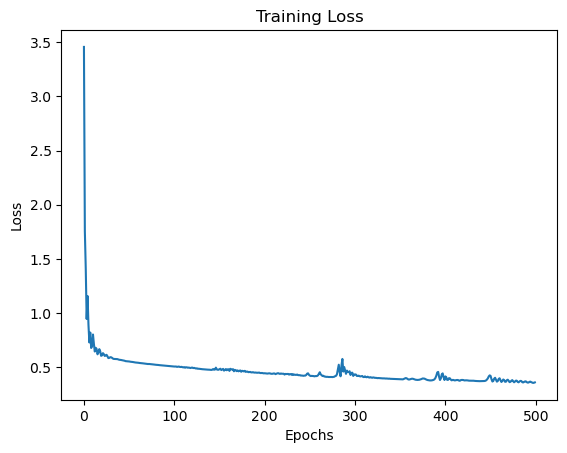

In [80]:
plt.plot(range(epochs), final_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [81]:
# Assuming X_test is already defined

predictions = []
with torch.no_grad():  # Disable gradient calculation for inference
    for i, data in enumerate(X_test):
        y_pred = model(data)  # Forward pass
        predictions.append(y_pred.argmax().item())  # Store the predicted class
        print(y_pred.argmax().item())  # Print the predicted class


1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[85, 22],
       [16, 31]], dtype=int64)

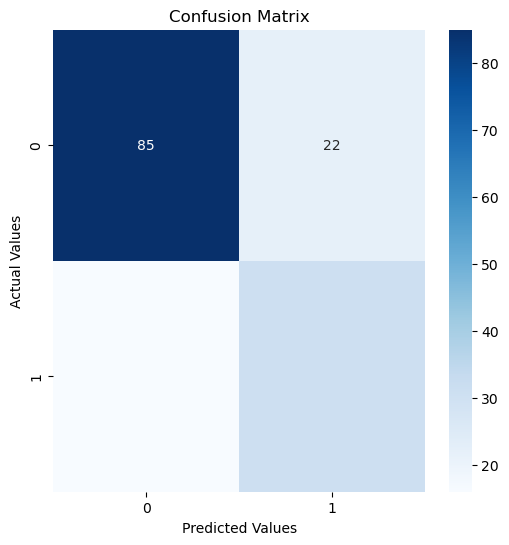

In [83]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [84]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7532467532467533

In [85]:
### Save Model
torch.save(model,'diabetes.pt')

In [86]:
### Save and Load the Model
model=torch.load('diabetes.pt')

In [87]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [88]:
### Prediction of new data points
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [89]:
### New Data
list1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [90]:
new_data=torch.tensor(list1)

In [91]:
### Predict New Data
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.2785, 1.4548])
1
